In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Files to Load
file1_to_load = "Resources/us_states.csv"
file2_to_load = "Resources/Anxiety_data.csv"

# Read CSV Files and store into Pandas data frames
covid_data = pd.read_csv(file1_to_load)
anxiety_data = pd.read_csv(file2_to_load)

#Display DataFrames for Covid and Anxiety data
display('Covid Data:', covid_data.head())
display('Anxiety Data:',anxiety_data.head())

'Covid Data:'

,date,state,fips,cases,deaths
0,1/21/2020,Washington,53,1,0
1,1/22/2020,Washington,53,1,0
2,1/23/2020,Washington,53,1,0
3,1/24/2020,Illinois,17,1,0
4,1/24/2020,Washington,53,1,0


'Anxiety Data:'

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN


In [3]:
del covid_data['fips']
covid_data

,date,state,cases,deaths
0,1/21/2020,Washington,1,0
1,1/22/2020,Washington,1,0
2,1/23/2020,Washington,1,0
3,1/24/2020,Illinois,1,0
4,1/24/2020,Washington,1,0
...,...,...,...,...
23054,4/25/2021,Virginia,654210,10691
23055,4/25/2021,Washington,397006,5478
23056,4/25/2021,West Virginia,151382,2821
23057,4/25/2021,Wisconsin,656668,7473


In [4]:
del anxiety_data['Group']
del anxiety_data['Subgroup']
del anxiety_data['Phase']
del anxiety_data['Time Period']
del anxiety_data['Time Period Label']
del anxiety_data['Time Period End Date']
del anxiety_data['Low CI']
del anxiety_data['High CI']
del anxiety_data['Confidence Interval']
del anxiety_data['Quartile Range']

#change the date format of anxiety_data to match covid_data's
anxiety_data['Time Period Start Date'] = anxiety_data['Time Period Start Date'].apply(lambda dateStr:dateStr.split()[0])

#change column names to assist merge and be meaningful
anxiety_data_renamed = anxiety_data.rename(columns={'State':'state',"Indicator":"mental disorder","Value":"frequency of mental disorder","Time Period Start Date":"date"})
anxiety_data_renamed

,mental disorder,state,date,frequency of mental disorder
0,Symptoms of Depressive Disorder,United States,4/23/2020,23.5
1,Symptoms of Depressive Disorder,United States,4/23/2020,32.7
2,Symptoms of Depressive Disorder,United States,4/23/2020,25.7
3,Symptoms of Depressive Disorder,United States,4/23/2020,24.8
4,Symptoms of Depressive Disorder,United States,4/23/2020,23.2
...,...,...,...,...
5779,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,3/17/2021,31.4
5780,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,3/17/2021,35.6
5781,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,3/17/2021,41.0
5782,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,3/17/2021,32.3


In [5]:
#merge data based on states
merged_data = covid_data.merge(anxiety_data_renamed,how="inner", on = ["state","date"])
merged_data

,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7
...,...,...,...,...,...,...
4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9
4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3
4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2
4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1


In [6]:
date_range = merged_data["date"].unique()
date_range

array(['4/23/2020', '5/7/2020', '5/14/2020', '5/21/2020', '5/28/2020',
       '6/4/2020', '6/11/2020', '6/18/2020', '6/25/2020', '7/2/2020',
       '7/9/2020', '7/16/2020', '8/19/2020', '9/2/2020', '9/16/2020',
       '9/30/2020', '10/14/2020', '10/28/2020', '11/11/2020',
       '11/25/2020', '12/9/2020', '1/6/2021', '1/20/2021', '2/3/2021',
       '2/17/2021', '3/3/2021', '3/17/2021'], dtype=object)

In [7]:
#April anxiety
anx_april_df = merged_data.loc[merged_data["date"] =="4/23/2020", :]
anx_april_df.head()

,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7


In [8]:
#May anxiety (I wanted to sort 5/7 ~ 5/28 but multiple array did not work so I just picked 5/28)
anx_may_df = merged_data.loc[merged_data["date"] == "5/28/2020", :]
anx_may_df.head()

,date,state,cases,deaths,mental disorder,frequency of mental disorder
612,5/28/2020,Alabama,16530,591,Symptoms of Depressive Disorder,28.4
613,5/28/2020,Alabama,16530,591,Symptoms of Anxiety Disorder,31.6
614,5/28/2020,Alabama,16530,591,Symptoms of Anxiety Disorder or Depressive Dis...,37.5
615,5/28/2020,Alaska,430,8,Symptoms of Depressive Disorder,24.4
616,5/28/2020,Alaska,430,8,Symptoms of Anxiety Disorder,26.1


In [9]:

anx_jun_df = merged_data.loc[merged_data["date"] == "6/25/2020", :]
anx_july_df = merged_data.loc[merged_data["date"] == "7/16/2020", :]
anx_aug_df = merged_data.loc[merged_data["date"] == "8/19/2020", :]
anx_sep_df = merged_data.loc[merged_data["date"] == "9/30/2020", :]
anx_oct_df = merged_data.loc[merged_data["date"] == "10/28/2020", :]
anx_nov_df = merged_data.loc[merged_data["date"] == "11/25/2020", :]
anx_dec_df = merged_data.loc[merged_data["date"] == "12/9/2020", :]
anx_jan_df = merged_data.loc[merged_data["date"] == "1/20/2021", :]
anx_feb_df = merged_data.loc[merged_data["date"] == "2/17/2021", :]
anx_march_df = merged_data.loc[merged_data["date"] == "3/17/2021", :]


In [10]:
mean_april_anx = (anx_april_df["frequency of mental disorder"]).mean()
mean_may_anx = (anx_may_df["frequency of mental disorder"]).mean()
mean_jun_anx = (anx_jun_df["frequency of mental disorder"]).mean()
mean_july_anx = (anx_july_df["frequency of mental disorder"]).mean()
mean_aug_anx = (anx_aug_df["frequency of mental disorder"]).mean()
mean_sep_anx = (anx_sep_df["frequency of mental disorder"]).mean()
mean_oct_anx = (anx_oct_df["frequency of mental disorder"]).mean()
mean_nov_anx = (anx_nov_df["frequency of mental disorder"]).mean()
mean_dec_anx = (anx_dec_df["frequency of mental disorder"]).mean()
mean_jan_anx = (anx_jan_df["frequency of mental disorder"]).mean()
mean_feb_anx = (anx_feb_df["frequency of mental disorder"]).mean()
mean_march_anx = (anx_march_df["frequency of mental disorder"]).mean()
US_Anxiety_bymonth_df = pd.DataFrame({"April": [mean_april_anx],
                                "May": [mean_may_anx],
                                "Jun": [mean_jun_anx],
                                "July": [mean_july_anx],
                                "August": [mean_aug_anx],
                                "September": [mean_sep_anx],
                                "October": [mean_oct_anx],
                                "November": [mean_nov_anx],
                                "December": [mean_dec_anx],
                                "January": [mean_jan_anx],
                                "February": [mean_feb_anx],
                                "March": [mean_march_anx]
                                
}
)

US_Anxiety_bymonth_df

,April,May,Jun,July,August,September,October,November,December,January,February,March
0,28.80719,29.051634,31.801307,34.953595,29.809804,30.875163,34.720261,35.22549,35.79085,34.068627,32.243137,29.190196


In [11]:
anx_frame_df = pd.DataFrame({
    "Months" : ["April 2020", "May", "Jun", "July", "August", "September", "October", "November", "December", "January 2021", "February 2021", "March"],
    "Frequency of mental disorder" :[28.80719, 29.051634, 31.801307, 34.953595, 29.809804, 30.875163, 34.720261, 35.22549, 35.79085, 34.068627, 32.243137, 29.190196]
})
anx_frame_df

,Months,Frequency of mental disorder
0,April 2020,28.807190
1,May,29.051634
2,Jun,31.801307
3,July,34.953595
4,August,29.809804
5,September,30.875163
6,October,34.720261
7,November,35.225490
8,December,35.790850
9,January 2021,34.068627


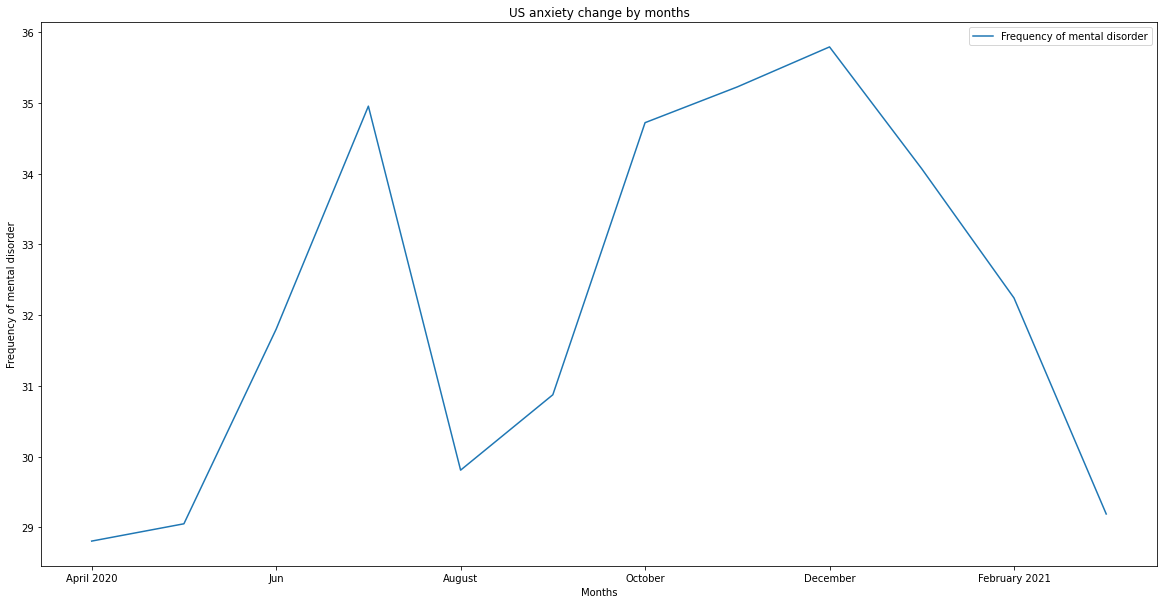

In [62]:
chart_anx = pd.DataFrame(anx_frame_df.groupby(["Months"]).count()).reset_index()
chart_anx_df = anx_frame_df[["Months", "Frequency of mental disorder"]]
chart_anx_df = chart_anx_df.set_index("Months")

chart_anx_df.plot(kind="line", figsize=(20,10))
plt.title("US anxiety change by months")
plt.ylabel("Frequency of mental disorder")
plt.savefig('Images/US anxiety change by month.png')
plt.show()

In [13]:
anx_group_state_df = merged_data.groupby(["state"])
anx_mean_state = anx_group_state_df.mean()
anx_mean_state.head()

,cases,deaths,frequency of mental disorder
state,,,
Alabama,1.739869e+05,3081.555556,32.496296
Alaska,1.789378e+04,86.259259,31.638272
Arizona,2.708545e+05,5512.000000,33.493827
Arkansas,1.061795e+05,1719.148148,34.324691
California,1.112002e+06,17291.148148,34.827160


In [14]:
del anx_mean_state['cases']
del anx_mean_state['deaths']
anx_mean_state

,frequency of mental disorder
state,
Alabama,32.496296
Alaska,31.638272
Arizona,33.493827
Arkansas,34.324691
California,34.827160
Colorado,32.427160
Connecticut,31.117284
Delaware,29.080247
District of Columbia,32.238272


In [15]:
# Collect a list of all the unique values in "date"
unique_dates_list = covid_data["date"].unique()
unique_dates_list

array(['1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020',
       '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020',
       '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020',
       '3/26/2020', '3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020',
       '3/

In [16]:
# 03/01/2020
covid_030120_df = covid_data.loc[covid_data["date"] =="3/1/2020", :]
covid_030120_df.head()

,date,state,cases,deaths
240,3/1/2020,Arizona,1,0
241,3/1/2020,California,33,0
242,3/1/2020,Florida,2,0
243,3/1/2020,Illinois,3,0
244,3/1/2020,Massachusetts,1,0


In [17]:
# Sort the DataFrame by "deaths" in ascending order
covid_030120_df = covid_030120_df.sort_values("deaths")
covid_030120_df

,date,state,cases,deaths
240,3/1/2020,Arizona,1,0
241,3/1/2020,California,33,0
242,3/1/2020,Florida,2,0
243,3/1/2020,Illinois,3,0
244,3/1/2020,Massachusetts,1,0
245,3/1/2020,Nebraska,13,0
246,3/1/2020,New York,1,0
247,3/1/2020,Oregon,2,0
248,3/1/2020,Rhode Island,2,0
249,3/1/2020,Texas,11,0


In [18]:
# Calculate total deaths as of 03/01/2020
total_deaths_030120 = (covid_030120_df["deaths"]).sum()
total_deaths_030120_df = pd.DataFrame({"Total deaths from COVID-19 as of 03/01/2020 in US": [total_deaths_030120]})
total_deaths_030120_df

,Total deaths from COVID-19 as of 03/01/2020 in US
0,3


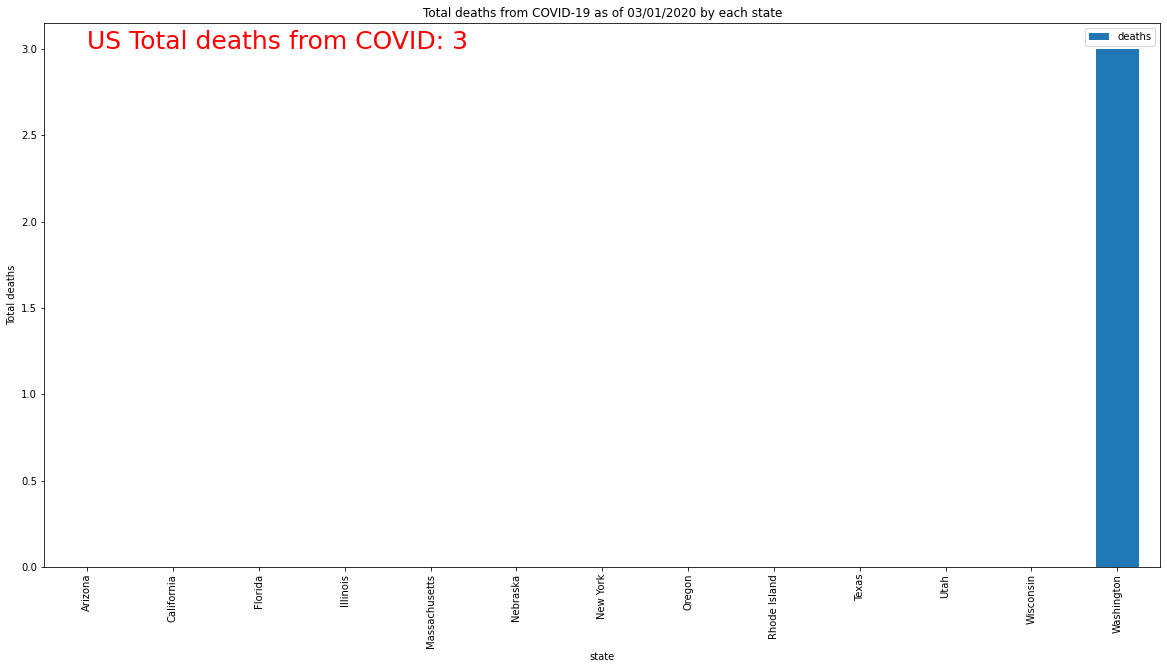

In [61]:
chart_030120 = pd.DataFrame(covid_030120_df.groupby(["state"]).count()).reset_index()
chart_030120_df = covid_030120_df[["state", "deaths"]]
chart_030120_df = chart_030120_df.set_index("state")

chart_030120_df.plot(kind="bar", figsize=(20,10))
plt.title("Total deaths from COVID-19 as of 03/01/2020 by each state")
plt.ylabel("Total deaths")
plt.annotate("US Total deaths from COVID: 3",(0,3), fontsize=25, color="red")
plt.savefig('Images/US Total deaths from COVID-19 as of 03-01-2020.png')
plt.show()

In [20]:
# Looking only at 04/23/2020
covid_042320_df = covid_data.loc[covid_data["date"] =="4/23/2020", :]
covid_042320_df.head()

,date,state,cases,deaths
2819,4/23/2020,Alabama,5832,197
2820,4/23/2020,Alaska,335,7
2821,4/23/2020,Arizona,5769,257
2822,4/23/2020,Arkansas,2599,45
2823,4/23/2020,California,39534,1548


In [21]:
# Sort the DataFrame by "deaths" in ascending order
covid_042320_df = covid_042320_df.sort_values("deaths")
covid_042320_df

,date,state,cases,deaths
2855,4/23/2020,Northern Mariana Islands,14,2
2868,4/23/2020,Virgin Islands,54,3
2830,4/23/2020,Guam,979,6
2873,4/23/2020,Wyoming,453,7
2820,4/23/2020,Alaska,335,7
2863,4/23/2020,South Dakota,1956,9
2831,4/23/2020,Hawaii,590,12
2846,4/23/2020,Montana,442,14
2854,4/23/2020,North Dakota,709,15
2871,4/23/2020,West Virginia,981,31


In [22]:
# Calculate total deaths as of 04/23/2020
total_deaths_042320 = (covid_042320_df["deaths"]).sum()
total_deaths_042320_df = pd.DataFrame({"Total deaths from COVID-19 as of 04/23/2020 in US": [total_deaths_042320]})
total_deaths_042320_df

,Total deaths from COVID-19 as of 04/23/2020 in US
0,49228


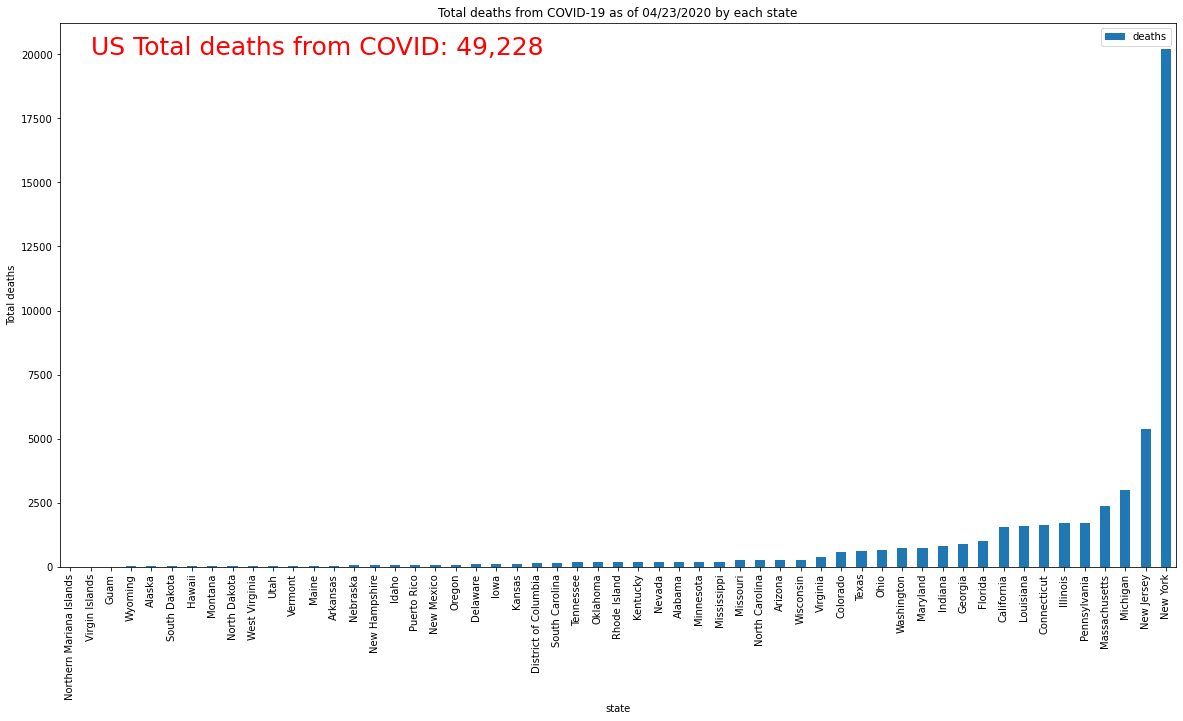

In [60]:
chart_042320 = pd.DataFrame(covid_042320_df.groupby(["state"]).count()).reset_index()
chart_042320_df = covid_042320_df[["state", "deaths"]]
chart_042320_df = chart_042320_df.set_index("state")

chart_042320_df.plot(kind="bar", figsize=(20,10))
plt.title("Total deaths from COVID-19 as of 04/23/2020 by each state")
plt.ylabel("Total deaths")
plt.annotate("US Total deaths from COVID: 49,228",(1,20000), fontsize=25, color="red")
plt.savefig('Images/US Total deaths from COVID-19 as of 04-23-2020.png')
plt.show()

In [54]:
# Looking only at 03/17/2021
covid_010121_df = covid_data.loc[covid_data["date"] =="1/1/2021", :]
covid_010121_df.head()

,date,state,cases,deaths
16734,1/1/2021,Alabama,365747,4872
16735,1/1/2021,Alaska,46740,198
16736,1/1/2021,Arizona,530267,9015
16737,1/1/2021,Arkansas,229442,3711
16738,1/1/2021,California,2345726,26236


In [55]:
# Sort the DataFrame by "deaths" in ascending order
covid_010121_df = covid_010121_df.sort_values("deaths")
covid_010121_df

,date,state,cases,deaths
16770,1/1/2021,Northern Mariana Islands,122,2
16783,1/1/2021,Virgin Islands,2036,23
16745,1/1/2021,Guam,8295,123
16782,1/1/2021,Vermont,7412,136
16735,1/1/2021,Alaska,46740,198
16746,1/1/2021,Hawaii,21736,287
16754,1/1/2021,Maine,24201,347
16788,1/1/2021,Wyoming,44409,438
16764,1/1/2021,New Hampshire,44028,759
16742,1/1/2021,District of Columbia,29252,788


In [56]:
# Calculate total deaths as of 03/17/2021
total_deaths_010121 = (covid_010121_df["deaths"]).sum()
total_deaths_010121_df = pd.DataFrame({"Total deaths from COVID-19 as of 01/01/2021 in US": [total_deaths_010121]})
total_deaths_010121_df

,Total deaths from COVID-19 as of 01/01/2021 in US
0,347970


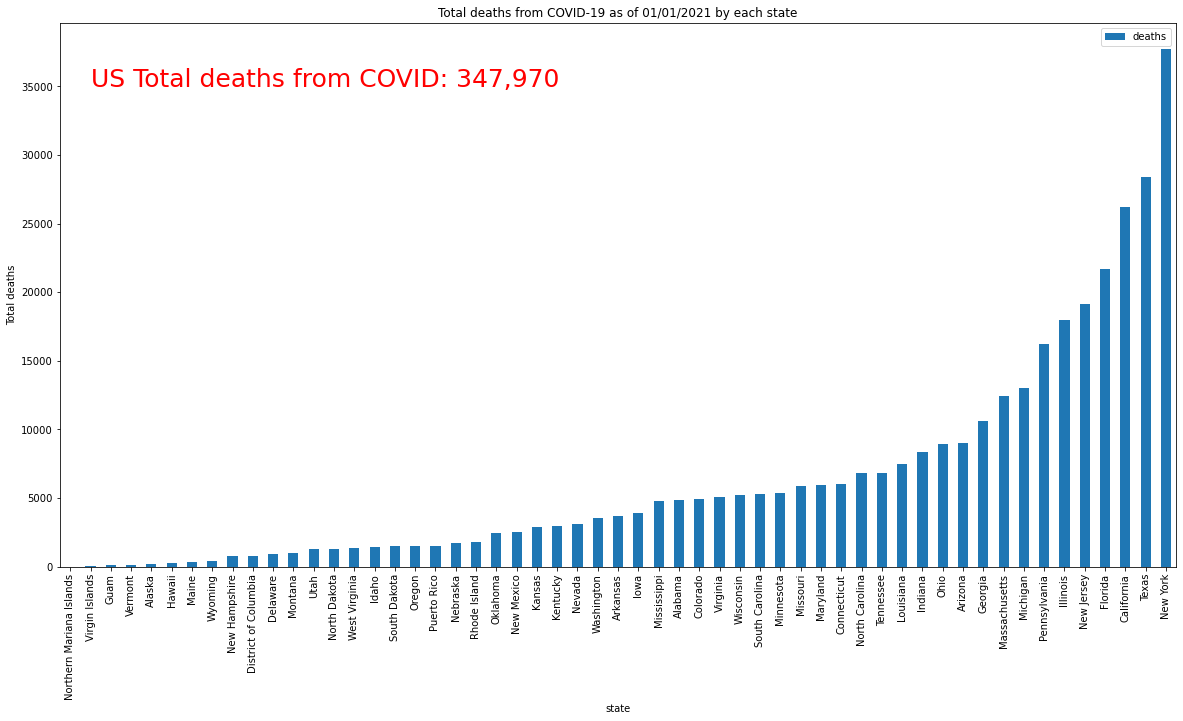

In [59]:
chart_010121 = pd.DataFrame(covid_010121_df.groupby(["state"]).count()).reset_index()
chart_010121_df = covid_010121_df[["state", "deaths"]]
chart_010121_df = chart_010121_df.set_index("state")

chart_010121_df.plot(kind="bar", figsize=(20,10))
plt.title("Total deaths from COVID-19 as of 01/01/2021 by each state")
plt.ylabel("Total deaths")
plt.annotate("US Total deaths from COVID: 347,970",(1,35000), fontsize=25, color="red")
plt.savefig('Images/US Total deaths from COVID-19 as of 01-01-2021.png')
plt.show()

In [28]:
# Looking only at 4/25/2021 which is peak
covid_042521_df = covid_data.loc[covid_data["date"] =="4/25/2021", :]
covid_042521_df.head()

,date,state,cases,deaths
23004,4/25/2021,Alabama,526131,10851
23005,4/25/2021,Alaska,66518,318
23006,4/25/2021,Arizona,858737,17268
23007,4/25/2021,Arkansas,334706,5718
23008,4/25/2021,California,3731677,61434


In [29]:
# Sort the DataFrame by "deaths" in ascending order
covid_042521_df = covid_042521_df.sort_values("deaths")
covid_042521_df

,date,state,cases,deaths
23040,4/25/2021,Northern Mariana Islands,164,2
23053,4/25/2021,Virgin Islands,3068,27
23015,4/25/2021,Guam,8884,137
23052,4/25/2021,Vermont,22576,244
23005,4/25/2021,Alaska,66518,318
23016,4/25/2021,Hawaii,32284,475
23058,4/25/2021,Wyoming,57696,705
23024,4/25/2021,Maine,59776,772
23012,4/25/2021,District of Columbia,47323,1099
23034,4/25/2021,New Hampshire,93821,1284


In [30]:
# Calculate total deaths as of 04/25/2021
total_deaths_042521 = (covid_042521_df["deaths"]).sum()
total_deaths_042521_df = pd.DataFrame({"Total deaths from COVID-19 as of 04/25/2021 in US": [total_deaths_042521]})
total_deaths_042521_df

,Total deaths from COVID-19 as of 04/25/2021 in US
0,571753


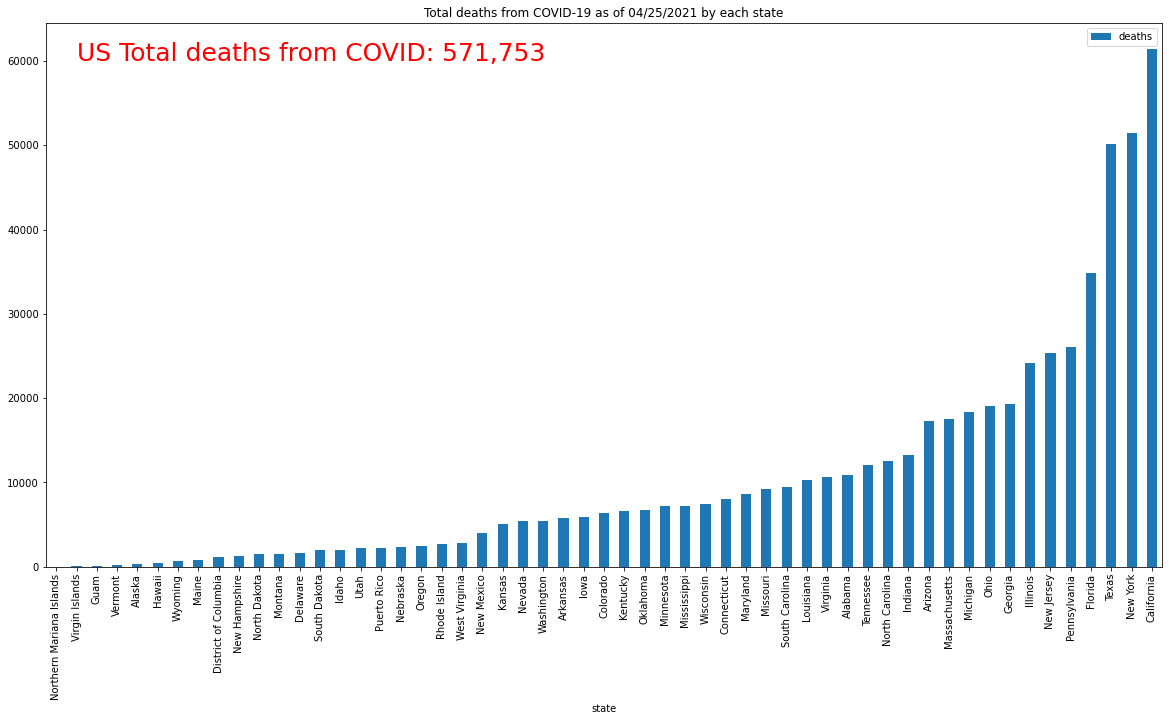

In [53]:
chart_042521 = pd.DataFrame(covid_042521_df.groupby(["state"]).count()).reset_index()
chart_042521_df = covid_042521_df[["state", "deaths"]]
chart_042521_df = chart_042521_df.set_index("state")

chart_042521_df.plot(kind="bar", figsize=(20,10))
plt.title("Total deaths from COVID-19 as of 04/25/2021 by each state")
plt.annotate("US Total deaths from COVID: 571,753",(1,60000), fontsize=25, color="red")
plt.savefig('Images/US Total deaths from COVID-19 as of 04-25-2021.png')
plt.show()


In [40]:
covid_042521_df["Percent Death"] = covid_042521_df["deaths"]/total_deaths_042521
del covid_042521_df['Percent']
covid_042521_df


,date,state,cases,deaths,Percent Death
23040,4/25/2021,Northern Mariana Islands,164,2,0.000003
23053,4/25/2021,Virgin Islands,3068,27,0.000047
23015,4/25/2021,Guam,8884,137,0.000240
23052,4/25/2021,Vermont,22576,244,0.000427
23005,4/25/2021,Alaska,66518,318,0.000556
23016,4/25/2021,Hawaii,32284,475,0.000831
23058,4/25/2021,Wyoming,57696,705,0.001233
23024,4/25/2021,Maine,59776,772,0.001350
23012,4/25/2021,District of Columbia,47323,1099,0.001922
23034,4/25/2021,New Hampshire,93821,1284,0.002246
